In [55]:
import tweepy
import time
import csv
import pandas as pd



consumer_key= 'insert'
consumer_secret= 'insert'
access_token= 'insert'
access_token_secret= 'insert'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [56]:
limit = 500
language = 'en' 
keywords = 'Beyoncé'
startDate = "2022-07-28"
endDate = "2022-07-31"
place = "United Kingdom"


# Passing the parameters into the Cursor constructor method
public_tweets = tweepy.Cursor( api.search,
                                q= keywords,
                                result_type='recent',
                                since = startDate,
                                until = endDate,
                                count=100,
                                include_entities=True,
                                lang=language,
                                tweet_mode="extended",
                                encoding='utf-8-sig').items(limit)

In [57]:
tweet_id_list = []
tweet_text_list = []
tweet_location_list = []
user_screen_name_list = []
tweet_created_list = []
tweet_contributors_list = []
tweet_retweet_count_list = []
tweet_source_list = []
tweet_username_list = []


# Iterating through the results to extract the results
for tweet in public_tweets:
    tweet_id_list.append(tweet.id)
    tweet_text_list.append(tweet.full_text)
    tweet_location_list.append(tweet.user.location)
    user_screen_name_list.append(tweet.user.screen_name)
    tweet_source_list.append(tweet.source)
    tweet_created_list.append(tweet.created_at)
    tweet_contributors_list.append(tweet.id_str)
    tweet_retweet_count_list.append(tweet.retweet_count)
    tweet_username_list.append(tweet.user.name)

# Creating a Pandas dataframe to organize the data into a table
df = pd.DataFrame({
    'tweet_id': tweet_id_list,
    'tweet_text': tweet_text_list,
    'tweet_location': tweet_location_list,
    'user_screen': user_screen_name_list,
    'tweet_source': tweet_source_list,
    'tweet_created': tweet_created_list,
    'tweet_contributors': tweet_contributors_list,
    'tweet_retweet_count': tweet_retweet_count_list,
    'tweet_username': tweet_username_list})

In [58]:
def cleanUpTweet(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'RT : ', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

In [69]:
df.to_csv('Bey_test.csv', sep=',', index=False, encoding='utf-8-sig')

# Saving the file to Google drive

file_name = "Bey_test.csv"

In [70]:
data =pd.read_csv("Bey_test.csv")

In [71]:
data.shape

(500, 10)

In [ ]:
data.head()

In [75]:
data.tweet_created= pd.to_datetime(data.tweet_created).dt.date

In [76]:
#change tweet_created from datetime to date https://www.youtube.com/watch?v=pao3QmuIbLs&list=PLtFmtptP5fJpkawGIGDptJI0BgN0OrueF&index=42&t=532s
data.head()

,tweet_id,tweet_text,tweet_location,user_screen,tweet_source,tweet_created,tweet_contributors,tweet_retweet_count,tweet_username,keyword
0,1553530880395776000,When Beyoncé says “deadass” 3x in a row… chills,Moody's Point,megundo_o,Twitter for iPhone,2022-07-30,1553530880395776000,0,Nosie Perez 💁🏻‍♀️,NaN
1,1553530879364022272,@beyonceaccess @OnAirRomeo @JayMacRadio @t_bra...,"Sousa, Paraiba Brasil",Regiicarlos,Twitter for Android,2022-07-30,1553530879364022272,0,Carlinhos 🌵,"Beyoncé,break my soul"
2,1553530879196233728,one time i said i wanted to smoke with Beyoncé...,NaN,xlove_delilahx,Twitter for iPhone,2022-07-30,1553530879196233728,0,Syd💕,NaN
3,1553530878927802368,RT @rumiyonce: the ending of heated &gt;&gt;&g...,france,smokencottin,Twitter for iPad,2022-07-30,1553530878927802368,6978,high fem kese,NaN
4,1553530876012658688,RT @honestynvm: Azealia Banks dancing to AMERI...,"England, United Kingdom",lesxholies,Twitter for iPhone,2022-07-30,1553530876012658688,2572,LI$♑️,NaN


In [82]:
#clean tweet and added column for clean tweet
def cleaner(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'RT : ', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

data["clean"] = data["tweet_text"].map(lambda x: cleaner(x))

In [83]:
data.head()

,tweet_id,tweet_text,tweet_location,user_screen,tweet_source,tweet_created,tweet_contributors,tweet_retweet_count,tweet_username,keyword,clean
0,1553530880395776000,When Beyoncé says “deadass” 3x in a row… chills,Moody's Point,megundo_o,Twitter for iPhone,2022-07-30,1553530880395776000,0,Nosie Perez 💁🏻‍♀️,NaN,When Beyoncé says “deadass” 3x in a row… chills
1,1553530879364022272,@beyonceaccess @OnAirRomeo @JayMacRadio @t_bra...,"Sousa, Paraiba Brasil",Regiicarlos,Twitter for Android,2022-07-30,1553530879364022272,0,Carlinhos 🌵,"Beyoncé,break my soul",Cento 51 Hey ! We’d like to listen ’...
2,1553530879196233728,one time i said i wanted to smoke with Beyoncé...,NaN,xlove_delilahx,Twitter for iPhone,2022-07-30,1553530879196233728,0,Syd💕,NaN,one time i said i wanted to smoke with Beyoncé...
3,1553530878927802368,RT @rumiyonce: the ending of heated &gt;&gt;&g...,france,smokencottin,Twitter for iPad,2022-07-30,1553530878927802368,6978,high fem kese,NaN,the ending of heated &gt;&gt;&gt;\nbeyoncé was...
4,1553530876012658688,RT @honestynvm: Azealia Banks dancing to AMERI...,"England, United Kingdom",lesxholies,Twitter for iPhone,2022-07-30,1553530876012658688,2572,LI$♑️,NaN,Azealia Banks dancing to AMERICA HAS A PROBLEM...


In [84]:
def get_keywords(row):
    keywords = []
    text = row["tweet_text"].lower()
    if "Beyoncé" in text or "beyonce" in text:
        keywords.append("Beyoncé")
    if "break" in text or "soul" in text:
        keywords.append("break my soul")
    if "alien" in text or "superstar" in text:
        keywords.append("alien superstar")
    return ",".join(keywords)
df["keyword"] = df.apply(get_keywords,axis=1)

In [85]:
import matplotlib.pyplot as plt
import numpy as np

In [86]:
counts = df["keyword"].value_counts()
print(counts)

                           303
Beyoncé,break my soul      100
Beyoncé                     73
alien superstar             17
break my soul                5
Beyoncé,alien superstar      2
Name: keyword, dtype: int64


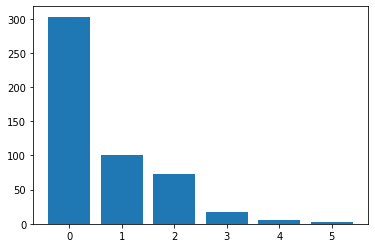

                           303
Beyoncé,break my soul      100
Beyoncé                     73
alien superstar             17
break my soul                5
Beyoncé,alien superstar      2
Name: keyword, dtype: int64


In [87]:
counts = df["keyword"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()
print(counts)

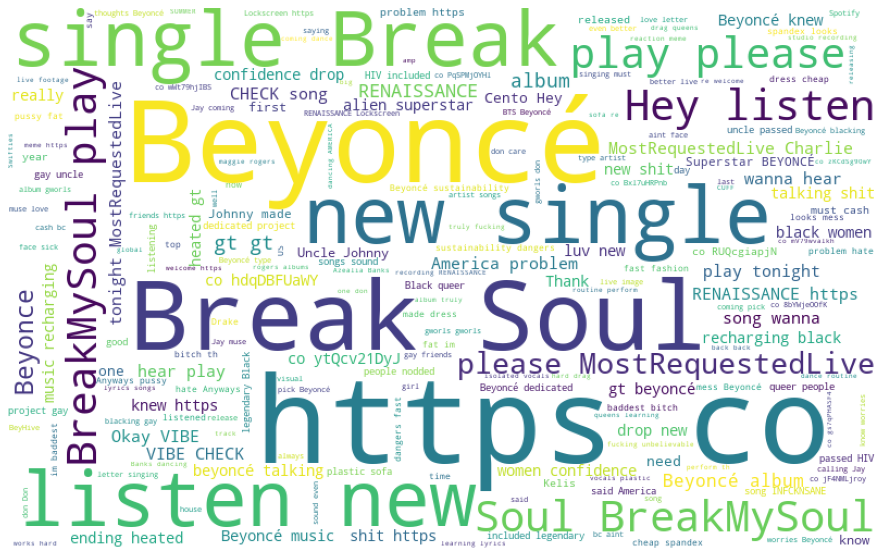

In [88]:
all_words = ' '.join([text for text in data['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [93]:
tokenizer = nlp.tokenizer
tokens = tokenizer(''.join(str(data.clean.tolist())))

In [ ]:
doc = nlp(tokens)

for ent in doc.ents:
  print(ent.text, ent.label)

In [95]:
norp_list = []
for ent in tokens.ents:
  if ent.label_ == 'NORP':
    norp_list.append(ent.text)

norp_counts = Counter(norp_list).most_common(20)
df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])

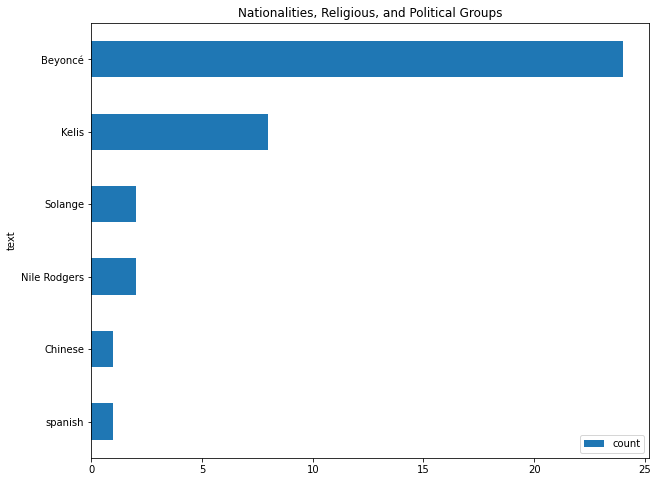

In [96]:
df_norp.plot.barh(x='text', y='count', title="Nationalities, Religious, and Political Groups", figsize=(10,8)).invert_yaxis()

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()